### 

---
---
---

In [25]:
pip freeze

absl-py==0.11.0
argon2-cffi==20.1.0
asn1crypto==0.24.0
astunparse==1.6.3
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
bleach==3.2.1
cachetools==4.2.0
certifi==2020.12.5
cffi==1.14.4
chardet==3.0.4
cryptography==2.1.4
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
et-xmlfile==1.1.0
flatbuffers==1.12
gast==0.3.3
google-auth==1.24.0
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
grpcio==1.32.0
h5py==2.10.0
idna==2.6
importlib-metadata==3.3.0
ipykernel==5.1.1
ipython==7.16.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.17.2
Jinja2==2.11.2
joblib==1.0.1
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.7
jupyter-console==6.2.0
jupyter-core==4.7.0
jupyter-http-over-ws==0.0.8
jupyterlab-pygments==0.1.2
Keras-Preprocessing==1.1.2
keyring==10.6.0
keyrings.alt==3.0
kiwisolver==1.3.1
Markdown==3.3.3
MarkupSafe==1.1.1
matplotlib==3.3.3
mistune==0.8.4
nbclient==0.5.1
nbconvert==6.0.7
nbformat==4.4.0
nest-asyncio==1.4.3
notebook==6.1.5
numpy==1.19.4
oauthlib==3.1.

#### This works if run with 'ipthon v_script.py'

* All four trained models are in the directory __'./models905'__.  Note that these are directories.  Models can be loaded with 
``` model = tf.keras.models.load_model('dir_path')```
    * do_dnn_model
    * nh4_dnn_model 
    * no3_dnn_model  
    * po4_dnn_model

  

* This directory contains the notebooks that build, train and save the models (using __'data905/training905.xlsx'__ for training data).
    * model_builder_DO.ipynb  
    * model_builder_NO3.ipynb
    * model_builder_NH4.ipynb  
    * model_builder_PO4.ipynb


* The directory __'./val_predictions'__ contains the predictions for each target.  The features come from __'./data905/validation905.xlsx'__
    * dnn_predicted_do.csv   
    * dnn_predicted_no3.csv
    * dnn_predicted_nh4.csv  
    * dnn_predicted_po4.csv

    








##### Make sure we have these modules

In [1]:
!pip install -q pandas
!pip install -q sklearn
!pip install -q openpyxl

##### Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(f'tensor flow version is {tf.__version__}')

tensor flow version is 2.4.0


In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##### Prep GPU

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(f'gpus ==> {gpus}')

gpus ==> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### Some useful functions

In [5]:
def build_and_compile_model(normalizer):
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def plot_loss(history, var_name):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel(f'Error [{var_name}]')
  plt.legend()
  plt.grid(True)

---
---
---

##### Get the validation data and examine

In [6]:
val_data_path = "data905/validation905.xlsx"

In [7]:
print(f'Loading validation data: {val_data_path}')

Loading validation data: data905/validation905.xlsx


In [8]:
val_data = pd.read_excel(val_data_path,na_values="NaN",  engine='openpyxl')

In [9]:
print('Done.')

Done.


In [10]:
# val_data.head()

In [11]:
# for val in ['GHI', 'TEMP', 'PH',
#        'TURB', 'SA DO', 'SA NO3', 'SA NH4', 'SA PO4']:
#     val_data.plot(x='datetime', y=val, kind='scatter')

In [12]:
#################################################################
#  Beginning of DO
#################################################################

##### Predict DO

Beginning DO...
Reloading model: models905/do_dnn_model...
Done

Predicting DO...
Done
r2 score:  -2.050688301584516
mean abs. error:  1.8951666345132276
Showing plot actual vs. predicted


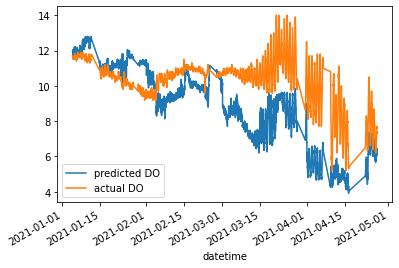

Target DO done.



In [13]:
print('Beginning DO...')

model_path = 'models905/do_dnn_model'

print(f'Reloading model: {model_path}...')

reload_do_dnn_model = tf.keras.models.load_model('models905/do_dnn_model')

print('Done')
print()

print('Predicting DO...')

do_features = [ 'Month', 'Day', 'Week', 'GHI', 'TEMP', 'PH', 'EC', 'TURB']

do_val_yhats = reload_do_dnn_model.predict(val_data[do_features])

print('Done')

do_target = ['SA DO']

print('r2 score: ', r2_score(val_data[do_target], do_val_yhats))

print('mean abs. error: ', mean_absolute_error(val_data[do_target], do_val_yhats))

# plt.scatter(val_data['datetime'], val_data[do_target], label='actual')
# plt.scatter(val_data['datetime'], do_val_yhats, color='red', alpha=0.5, label='pred')
# plt.xlabel('Actual DO')
# plt.ylabel('Predicted [DO]')
# plt.legend()
# plt.grid(True)
# plt.show()

# Save the predictions along with time and actual DO.

do_val_output = pd.DataFrame()
do_val_output['datetime'] = val_data['datetime']
do_val_output['predicted DO'] = do_val_yhats
do_val_output['actual DO'] = val_data['SA DO']
# print(do_val_output.head())

print('Showing plot actual vs. predicted')

do_val_output.plot(x='datetime', y=['predicted DO', 'actual DO'])
plt.show(block=False)

# do_val_output.to_csv('dnn_predicted_do.csv', index=False)

print('Target DO done.')
print()

In [14]:
#################################################################
#  End of DO
#################################################################

In [15]:
#################################################################
#  Beginning of NO3
#################################################################

Beginning no3...
Reloading model: models905/no3_dnn_model...
Done

Predicting no3...
Done
r2 score:  0.2299412216619442
mean abs. error:  1.587766544953746
Showing plot actual vs. predicted


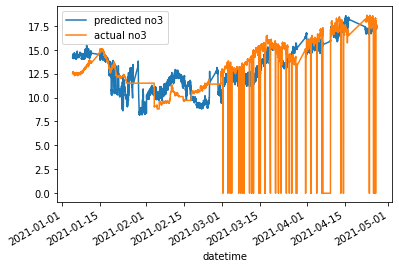

Target NO3 done.



In [16]:
print('Beginning no3...')

model_path = 'models905/no3_dnn_model'

print(f'Reloading model: {model_path}...')

reload_no3_dnn_model = tf.keras.models.load_model('models905/no3_dnn_model')

print('Done')
print()

print('Predicting no3...')

no3_features = [ 'Month', 'Day', 'Week', 'GHI', 'TEMP', 'PH', 'EC', 'TURB', 'SA DO']
no3_val_yhats = reload_no3_dnn_model.predict(val_data[no3_features])

print('Done')

no3_target = ['SA NO3']

print('r2 score: ', r2_score(val_data[no3_target], no3_val_yhats))

print('mean abs. error: ', mean_absolute_error(val_data[no3_target], no3_val_yhats))

# plt.scatter(val_data['datetime'], val_data[no3_target], label='actual')
# plt.scatter(val_data['datetime'], no3_val_yhats, color='red', alpha=0.5, label='pred')
# plt.xlabel('Actual no3')
# plt.ylabel('Predicted [no3]')
# plt.legend()
# plt.grid(True)
# plt.show()

# Save the predictions along with time and actual no3.

no3_val_output = pd.DataFrame()
no3_val_output['datetime'] = val_data['datetime']
no3_val_output['predicted no3'] = no3_val_yhats
no3_val_output['actual no3'] = val_data['SA NO3']
# print(no3_val_output.head())

print('Showing plot actual vs. predicted')

no3_val_output.plot(x='datetime', y=['predicted no3', 'actual no3'])
plt.show(block=False)

# no3_val_output.to_csv('dnn_predicted_no3.csv', index=False)

print('Target NO3 done.')
print()

In [17]:
#################################################################
#  End of NO3
#################################################################

In [18]:
#################################################################
#  Beginning of NH4
#################################################################

Beginning nh4...
Reloading model: models905/nh4_dnn_model...
Done

Predicting nh4...
Done
r2 score:  -0.8804204584142983
mean abs. error:  0.10870871962638337
Showing plot actual vs. predicted


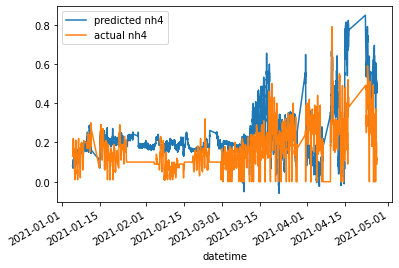

Target NH4 done.



In [19]:
print('Beginning nh4...')

model_path = 'models905/nh4_dnn_model'

print(f'Reloading model: {model_path}...')

reload_nh4_dnn_model = tf.keras.models.load_model('models905/nh4_dnn_model')

print('Done')
print()

print('Predicting nh4...')

nh4_features = [ 'Month', 'Day', 'Week', 'GHI', 'TEMP', 
                'PH', 'EC', 'TURB', 'SA DO', 'SA NO3']
nh4_val_yhats = reload_nh4_dnn_model.predict(val_data[nh4_features])

print('Done')

nh4_target = ['SA NH4']

print('r2 score: ', r2_score(val_data[nh4_target], nh4_val_yhats))

print('mean abs. error: ', mean_absolute_error(val_data[nh4_target], nh4_val_yhats))

# plt.scatter(val_data['datetime'], val_data[nh4_target], label='actual')
# plt.scatter(val_data['datetime'], nh4_val_yhats, color='red', alpha=0.5, label='pred')
# plt.xlabel('Actual nh4')
# plt.ylabel('Predicted [nh4]')
# plt.legend()
# plt.grid(True)
# plt.show()

# Save the predictions along with time and actual nh4.

nh4_val_output = pd.DataFrame()
nh4_val_output['datetime'] = val_data['datetime']
nh4_val_output['predicted nh4'] = nh4_val_yhats
nh4_val_output['actual nh4'] = val_data['SA NH4']
# print(nh4_val_output.head())

print('Showing plot actual vs. predicted')

nh4_val_output.plot(x='datetime', y=['predicted nh4', 'actual nh4'])
plt.show(block=False)

# nh4_val_output.to_csv('dnn_predicted_nh4.csv', index=False)

print('Target NH4 done.')
print()

In [20]:
#################################################################
#  End of NH4
#################################################################

In [21]:
#################################################################
#  Beginning of PO4
#################################################################

Beginning po4...
Reloading model: models905/po4_dnn_model...
Done

Predicting po4...
Done
r2 score:  -5.362994617271958
mean abs. error:  0.1000375455225374
Showing plot actual vs. predicted


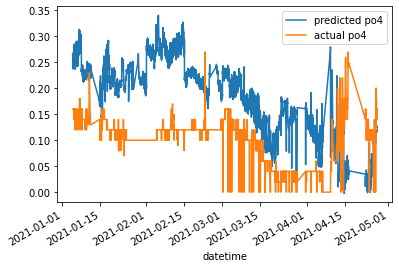

Target PO4 done.



In [22]:
print('Beginning po4...')

model_path = 'models905/po4_dnn_model'

print(f'Reloading model: {model_path}...')

reload_po4_dnn_model = tf.keras.models.load_model('models905/po4_dnn_model')

print('Done')
print()

print('Predicting po4...')

po4_features = [ 'Month', 'Day', 'Week', 'GHI', 'TEMP', 
                'PH', 'EC', 'TURB', 'SA DO', 'SA NO3', 'SA NH4']
po4_val_yhats = reload_po4_dnn_model.predict(val_data[po4_features])

print('Done')

po4_target = ['SA PO4']

print('r2 score: ', r2_score(val_data[po4_target], po4_val_yhats))

print('mean abs. error: ', mean_absolute_error(val_data[po4_target], po4_val_yhats))

# plt.scatter(val_data['datetime'], val_data[po4_target], label='actual')
# plt.scatter(val_data['datetime'], po4_val_yhats, color='red', alpha=0.5, label='pred')
# plt.xlabel('Actual po4')
# plt.ylabel('Predicted [po4]')
# plt.legend()
# plt.grid(True)
# plt.show()

# Save the predictions along with time and actual po4.

po4_val_output = pd.DataFrame()
po4_val_output['datetime'] = val_data['datetime']
po4_val_output['predicted po4'] = po4_val_yhats
po4_val_output['actual po4'] = val_data['SA PO4']
# print(po4_val_output.head())

print('Showing plot actual vs. predicted')

po4_val_output.plot(x='datetime', y=['predicted po4', 'actual po4'])
plt.show(block=False)

# po4_val_output.to_csv('dnn_predicted_po4.csv', index=False)

print('Target PO4 done.')
print()

In [23]:
#################################################################
#  End of PO4
#################################################################

In [24]:
x = input('Press enter to dismiss charts.')

Press enter to dismiss charts.
